In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample # selecting random centroids

In [ ]:
# Load dataset
data = np.loadtxt('dataset.txt')

In [ ]:
# Euclidean distance
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Randomly select k
def initialize_centroids(data, k):
    return data[sample(range(data.shape[0]), k)]

# Assign data-points to closest centroid
def assign_clusters(data, centroids):
    clusters = [] # empty list
    for point in data:
        distances = [euclidean(point, centroid) for centroid in centroids] # collected into a list distances
        clusters.append(np.argmin(distances)) # finds the index
    return clusters # returns the clusters list

In [ ]:
# Compute new centroids as the mean of all points in each cluster
def compute_centroids(data, clusters, k):  # k = the number of clusters
    new_centroids = [] # store the newly computed centroids
    for i in range(k): # cluster index from 0 to k-1
        cluster_points = data[np.array(clusters) == i] # creates a boolean array
        if len(cluster_points) > 0:
            new_centroids.append(np.mean(cluster_points, axis=0)) # means calculate
    return new_centroids # returns the new_centroids

# Calculate WCSS (within-cluster sum of squares)
def calculate_wcss(data, clusters, centroids):
    wcss = 0
    for i, point in enumerate(data):
        wcss += euclidean(point, centroids[clusters[i]]) ** 2   # calculates Euclidean distance
    return wcss

# k-means clustering
def kmeans(data, k, max_iter=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iter): # update clusters and centroids
        clusters = assign_clusters(data, centroids)
        new_centroids = compute_centroids(data, clusters, k)
        if np.allclose(centroids, new_centroids): # comparing old centroids amd new centroids
            break
        centroids = new_centroids
    return clusters, centroids  # returns the final cluster and centroids

In [ ]:
# Run the Elbow method to find the optimal number of clusters
wcss_values = []
K_values = range(1, 11)

for k in K_values:
    clusters, centroids = kmeans(data, k)
    wcss = calculate_wcss(data, clusters, centroids)
    wcss_values.append(wcss)

In [ ]:
# Find the elbow point using the maximum curvature
def find_elbow_point(wcss_values):
    # Compute the differences between successive WCSS values
    first_derivative = np.diff(wcss_values)
    # Compute the second derivative
    second_derivative = np.diff(first_derivative)
    # Find the maximum index value of second derivative; elbow point
    elbow_index = np.argmax(second_derivative) + 1  # Add 1 of second diff
    return elbow_index

# Get the elbow point
elbow_point = find_elbow_point(wcss_values)
optimal_k = K_values[elbow_point]

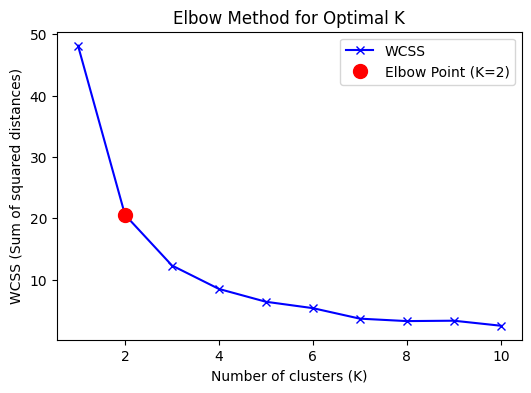

The optimal value of K determined by the Elbow method is: 2


In [ ]:
# Plot the Elbow curve and highlight the elbow point
plt.figure(figsize=(6, 4))  #  Initializes a new figure
# Line style (blue color, 'x' markers, solid line) and Label for the WCSS line
plt.plot(K_values, wcss_values, 'bx-', label='WCSS') # X-axis values (number of clusters) and Y-axis values (WCSS)
# Marker style (red color, 'o' markers); Size of the marker
plt.plot(optimal_k, wcss_values[elbow_point], 'ro', markersize=10, label=f'Elbow Point (K={optimal_k})')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Sum of squared distances)')
plt.title('Elbow Method for Optimal K')
# Adds a legend to the plot to distinguish between the WCSS curve and the elbow point marker.
plt.legend()
# plot show on the screen
plt.show()
# Print the optimal number of clusters (K) identified by the Elbow method
print(f"The optimal value of K determined by the Elbow method is: {optimal_k}")